<a href="https://colab.research.google.com/github/Rohit-Rannavre/data-science/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data preprocessing

In [132]:
# checking the shape of the dataset
df.shape

(303, 14)

In [133]:
# checking the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [134]:
# looking at the stats of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


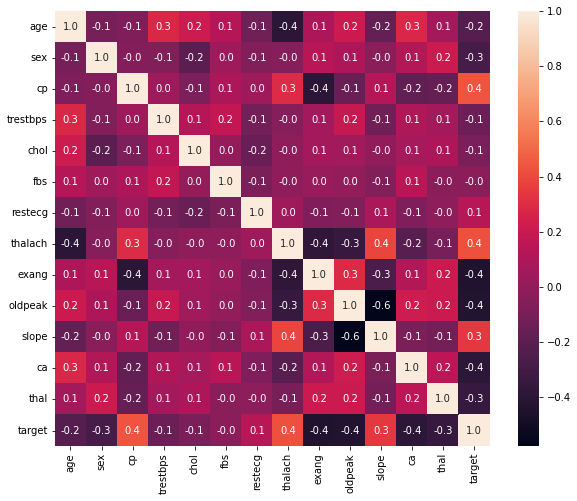

In [135]:
# looking at the corellations of the dataset
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', square = True)
plt.show();

In [136]:
# checking the taget values
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Model building

In [137]:
# creating X & y
X = df.drop('target', axis = 1)
y = df['target']

In [138]:
# splitting the dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18, stratify = y)

In [139]:
# feature scaling
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [140]:
# applying the model to the data
log_reg = LogisticRegression()
log_reg.fit(X_train_trf, y_train)

LogisticRegression()

In [141]:
# checking the accuracy on training data
X_train_pred = log_reg.predict(X_train_trf)
training_accu = metrics.accuracy_score(X_train_pred, y_train)
print('Accuracy on traning data: ', training_accu)

Accuracy on traning data:  0.8471074380165289


In [142]:
# checking the accuracy on testing data
X_test_pred = log_reg.predict(X_test_trf)
testing_accu = metrics.accuracy_score(X_test_pred, y_test)
print('Accuracy on traning data: ', testing_accu)

Accuracy on traning data:  0.8852459016393442
